## Importing libraries

In [33]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import itertools 
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,  LSTM, Embedding, SpatialDropout1D

## Reading Data

In [2]:
df = pd.read_csv("/kaggle/input/shai-training-2024-a-level-2/Train.csv")
val = pd.read_csv("/kaggle/input/shai-training-2024-a-level-2/Valid.csv")
test = pd.read_csv("/kaggle/input/shai-training-2024-a-level-2/Test.csv")
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [3]:
z_label = df[df["label"]==0]
o_label = df[df["label"]==1]

Text(0.5, 1.0, 'Word cloud for Birth control')

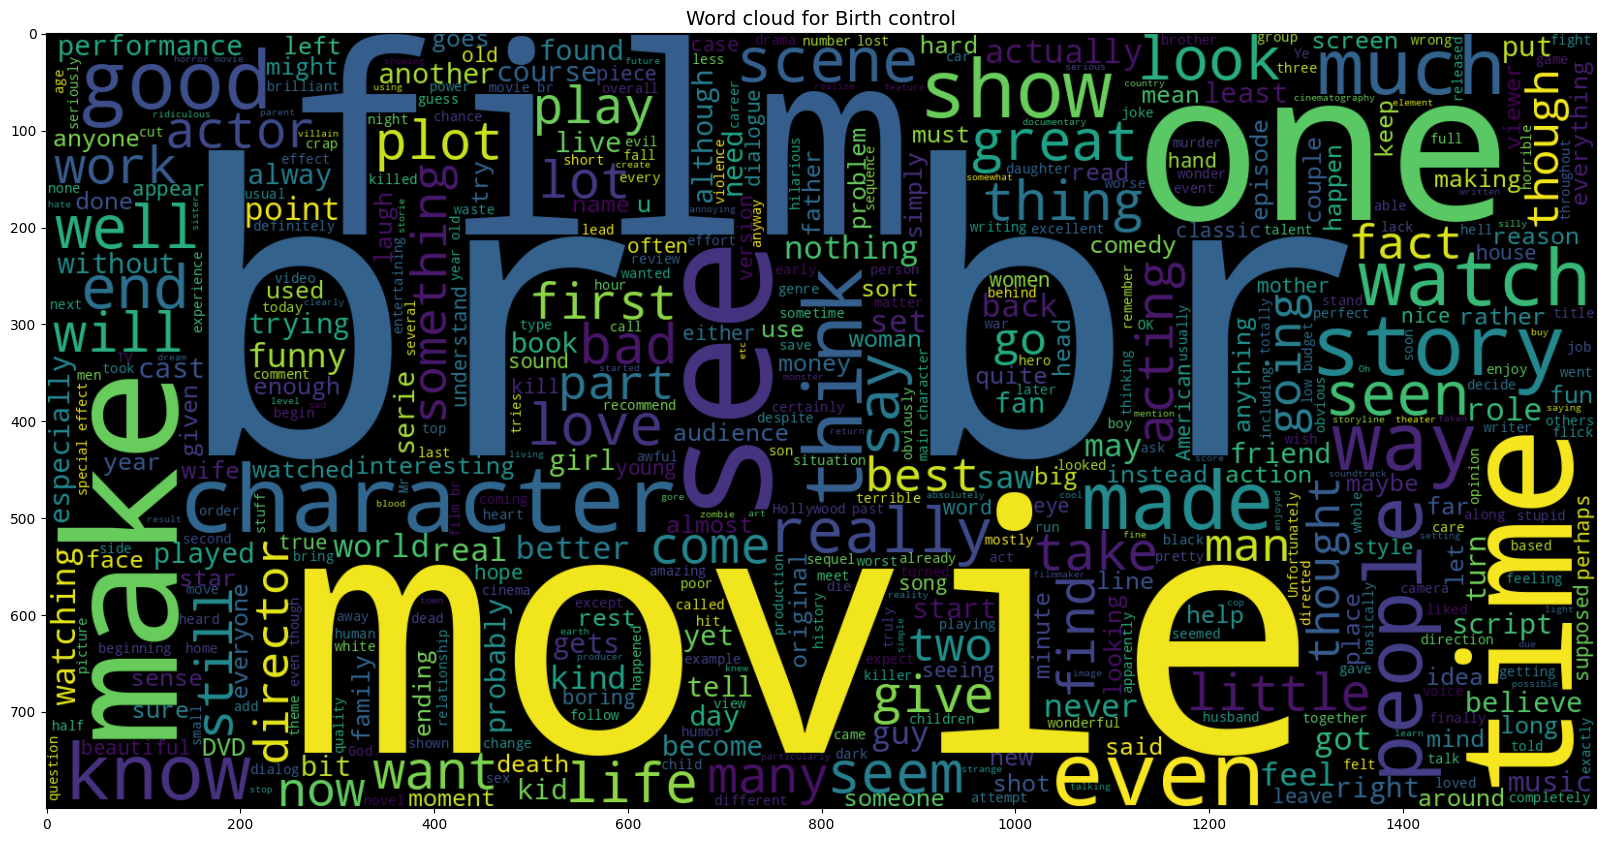

In [5]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth control',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Depression')

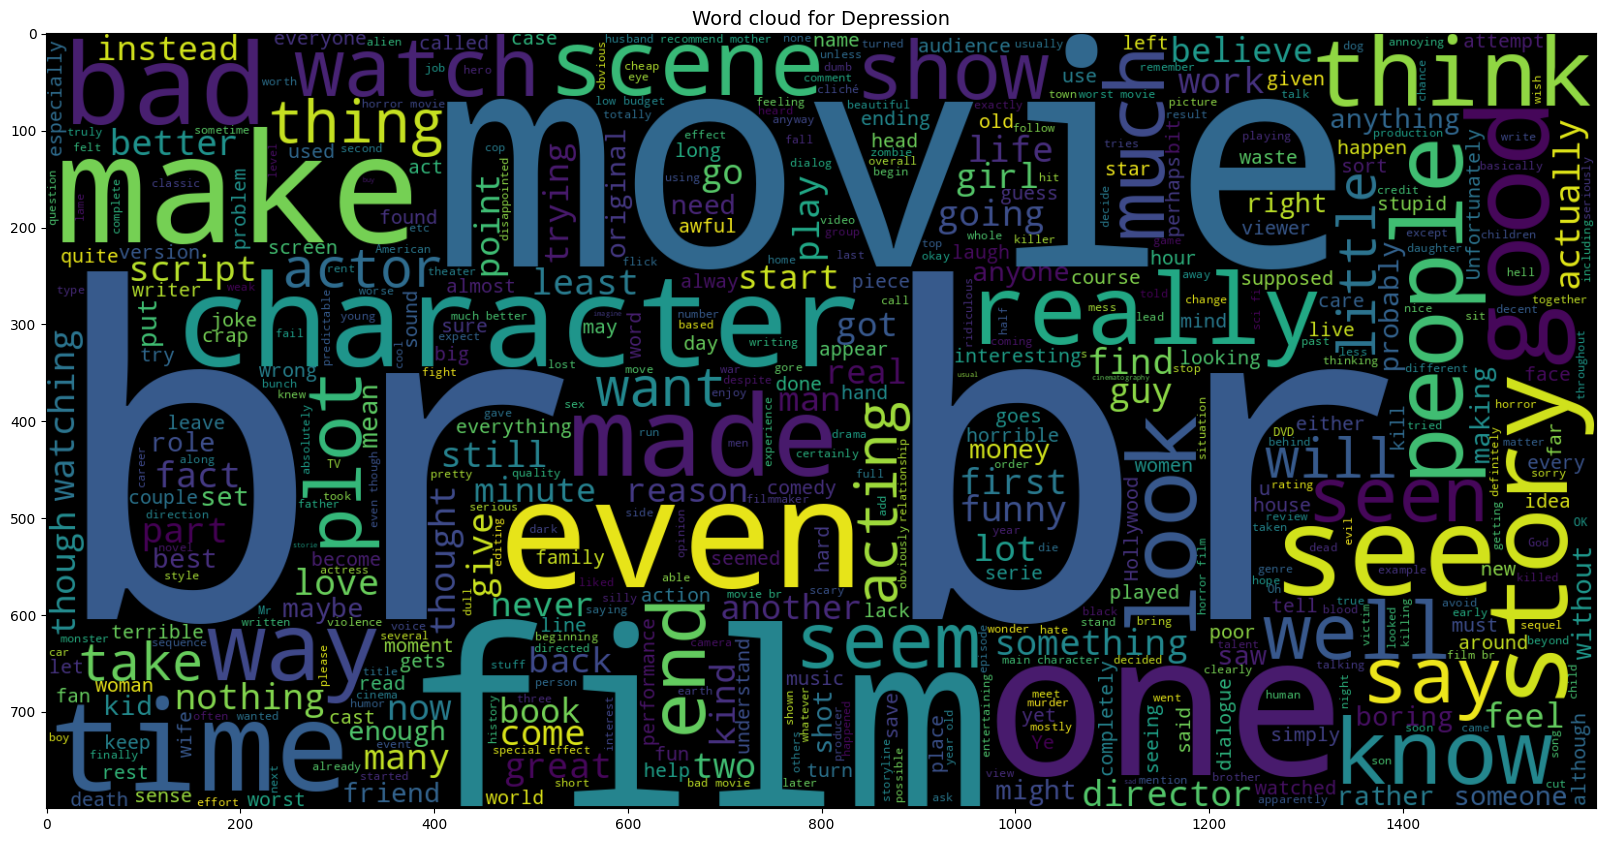

In [6]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(z_label.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=14)

Text(0.5, 1.0, 'Word cloud for High Blood Pressure')

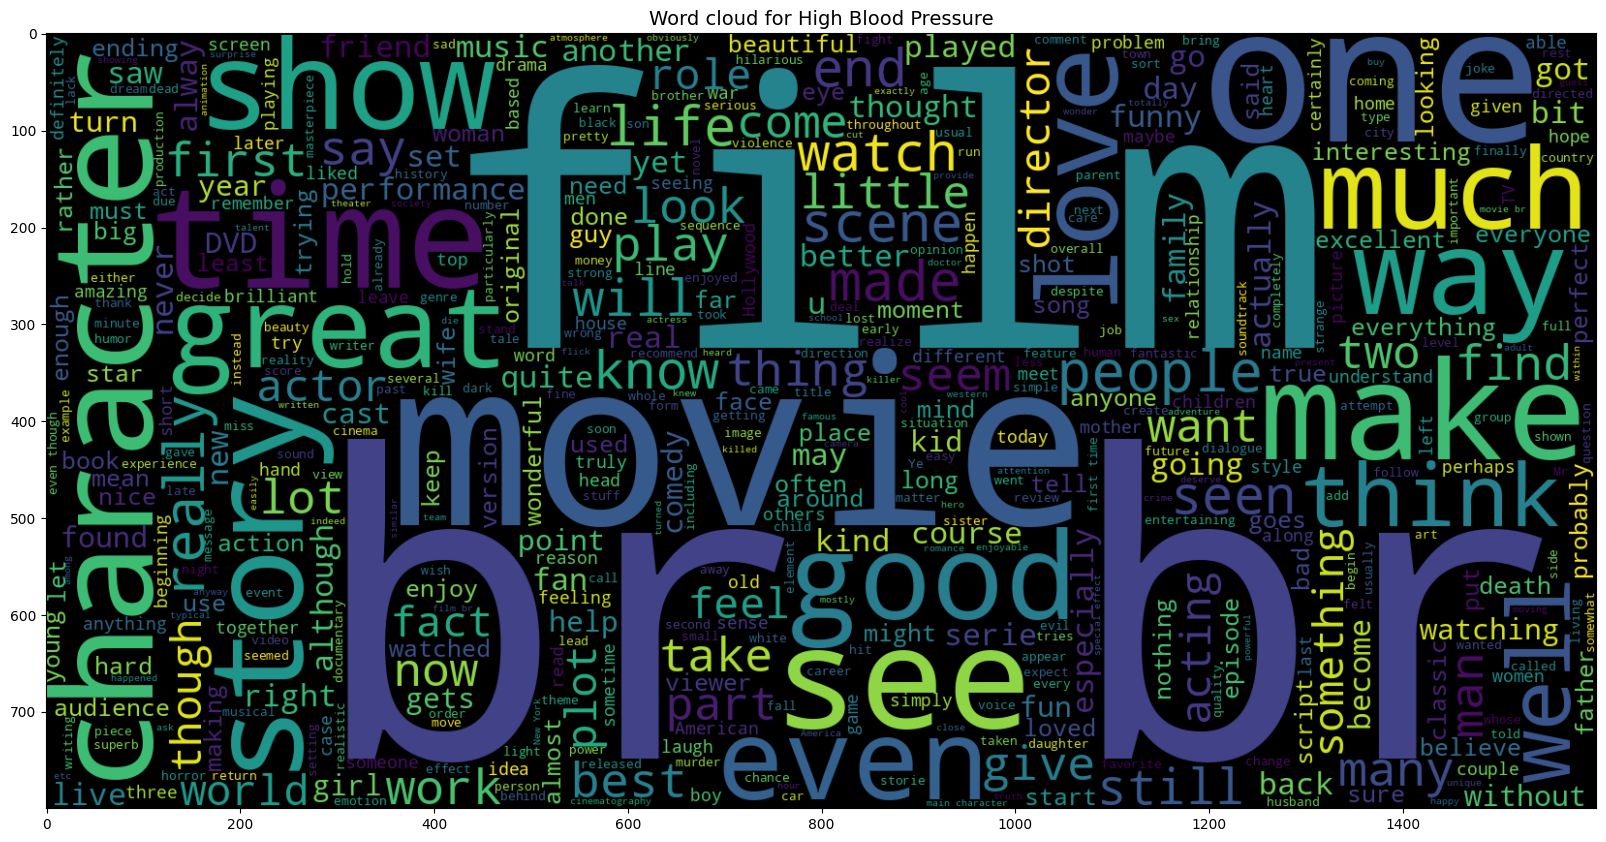

In [7]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(o_label.text))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=14)

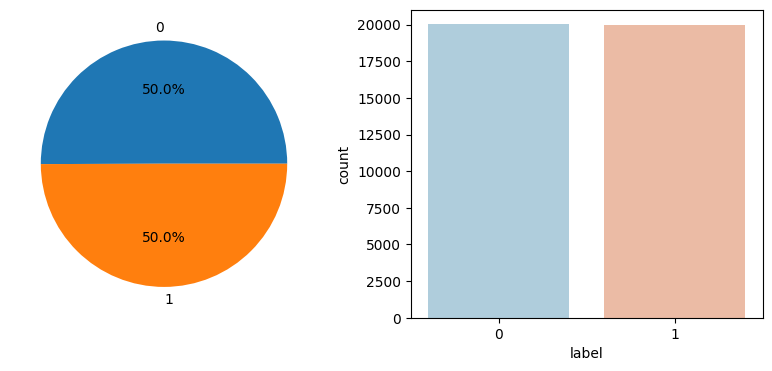

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].pie(df.label.value_counts(), labels=df.label.value_counts().index, autopct='%.1f%%')
sns.countplot(x='label', data=df, palette='RdBu_r')
plt.show()

## Data Preprocessing

**procedures**
* Lowercasing
* Removing special characters, URLs, and user handles
* Removing stop words
* Stemming

In [5]:
nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    # Lowercasing
    text = text.lower()

    # Removing special characters, URLs, and user handles
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'<br>', ' ', text)
    text = re.sub(r'\'', ' ', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into text
    cleaned_text = ' '.join(tokens)

    return cleaned_text

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df['text_clean'] = df['text'].apply(clean_text)
val['text_clean'] = val['text'].apply(clean_text)

In [7]:
test['text_clean'] = test['text'].apply(clean_text)

## Creating features and Target Variable

In [10]:
X_train, X_test, y_train, y_test = df["text_clean"], val["text_clean"], df["label"], val["label"]

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Machine Learing Models : with Bag words

**Bag words**

In [12]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

count_sub_test = count_vectorizer.transform(test['text_clean'])

### Naive Bayes

In [13]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)

MultinomialNB()

In [14]:
pred = mnb.predict(count_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2486
           1       0.87      0.83      0.85      2514

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



Confusion matrix, without normalization


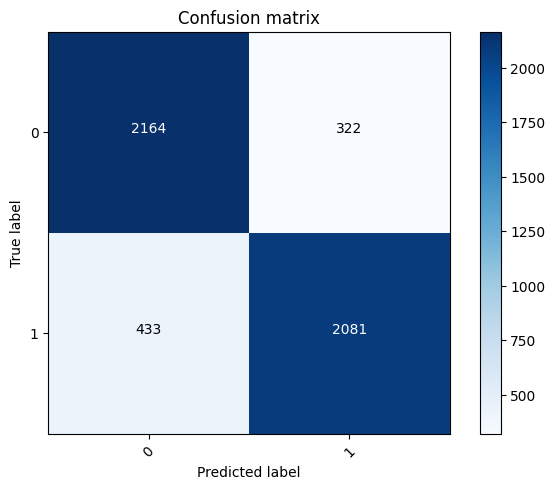

In [15]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, [0, 1])

### Passive Aggressive Classifier

In [17]:
passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)

PassiveAggressiveClassifier()

In [18]:
pred = passive.predict(count_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2486
           1       0.85      0.87      0.86      2514

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



Confusion matrix, without normalization


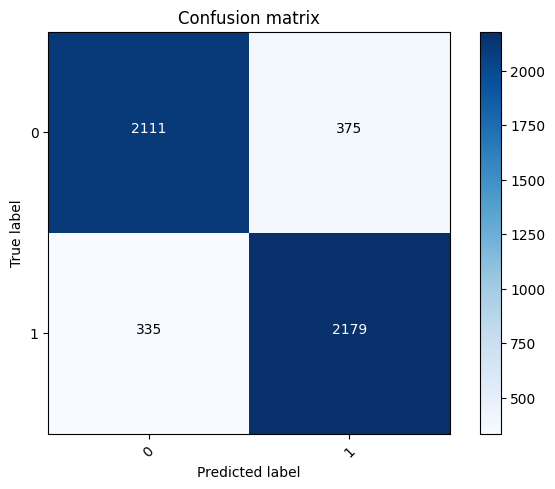

In [19]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, [0,1])

## Machine Learing Models : with TF_IDF 

**TF_IDF**

In [34]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
tfidf_sub_test = tfidf_vectorizer.transform(test['text_clean'])

### Naive Bayes

In [35]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train, y_train)

MultinomialNB()

In [49]:
pred = mnb_tf.predict(tfidf_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2486
           1       0.87      0.85      0.86      2514

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



Confusion matrix, without normalization


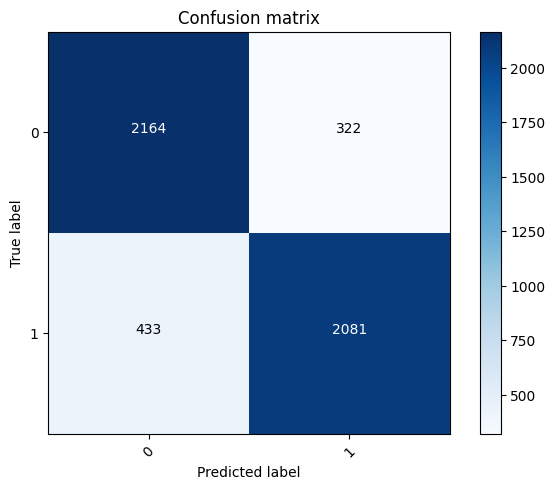

In [38]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, [0, 1])

### Passive Aggressive Classifier 

In [39]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)

PassiveAggressiveClassifier()

In [48]:
pred = pass_tf.predict(tfidf_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2486
           1       0.86      0.88      0.87      2514

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



Confusion matrix, without normalization


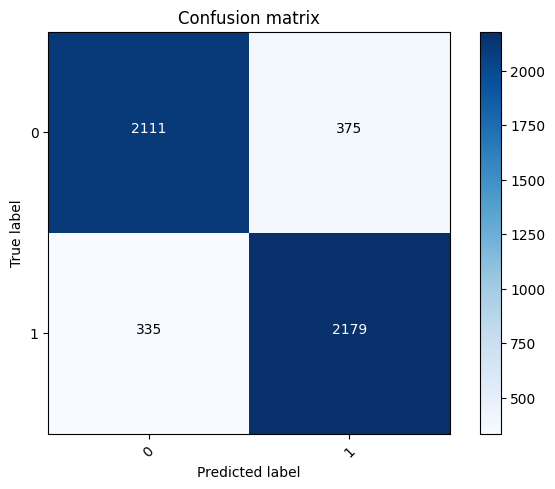

In [41]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm,[0,1])

## Machine Learing Models : with TF_IDF: Bigrams

**TF_IDF: Bigrams**

In [42]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)
tfidf_sub_test_2 = tfidf_vectorizer2.transform(test["text_clean"])

### PassiveAggressiveClassifier

In [43]:
pass_tf2 = PassiveAggressiveClassifier()
pass_tf2.fit(tfidf_train_2, y_train)

PassiveAggressiveClassifier()

In [47]:
pred = pass_tf2.predict(tfidf_test_2)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2486
           1       0.89      0.92      0.91      2514

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



Confusion matrix, without normalization


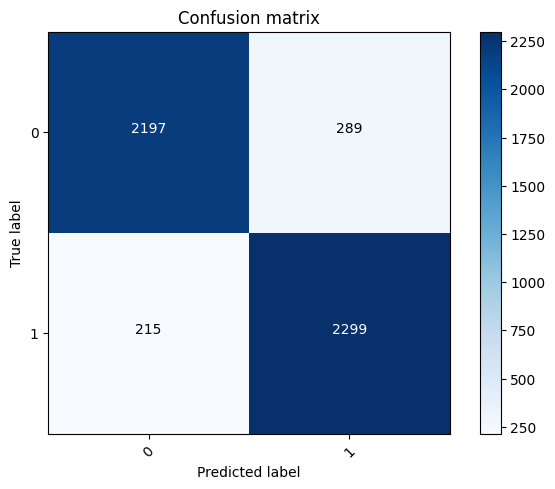

In [60]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, [0, 1])

## Machine Learing Models : with TF_IDF : Trigrams

**TF_IDF : Trigrams**

In [50]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)
tfidf_sub_test_3 = tfidf_vectorizer3.transform(test["text_clean"])

### Passive Aggressive Classifier

In [51]:
pass_tf3 = PassiveAggressiveClassifier()
pass_tf3.fit(tfidf_train_3, y_train)

PassiveAggressiveClassifier()

In [52]:
pred = pass_tf3.predict(tfidf_test_3)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      2486
           1       0.88      0.92      0.90      2514

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



Confusion matrix, without normalization


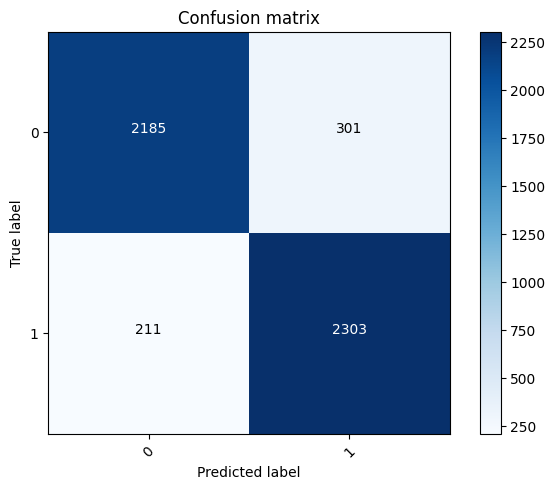

In [53]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm,[0,1])

## Neurak network

In [57]:
from sklearn.decomposition import TruncatedSVD

n_components = 100  
svd = TruncatedSVD(n_components=n_components)
tfidf_train_reduced = svd.fit_transform(tfidf_train)
tfidf_test_reduced = svd.transform(tfidf_test)

In [58]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True
)

In [59]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(tfidf_train_reduced.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [60]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [61]:
history = model.fit(tfidf_train_reduced, y_train, epochs=100, batch_size=32,
                    callbacks=[early_stopping],
                    validation_data=(tfidf_test_reduced, y_test))

Epoch 1/100
  75/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5193 - loss: 0.6898

I0000 00:00:1715282069.261184     633 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7672 - loss: 0.4578 - val_accuracy: 0.8522 - val_loss: 0.3335
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8570 - loss: 0.3367 - val_accuracy: 0.8558 - val_loss: 0.3275
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8613 - loss: 0.3264 - val_accuracy: 0.8490 - val_loss: 0.3495
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8669 - loss: 0.3106 - val_accuracy: 0.8530 - val_loss: 0.3254
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8732 - loss: 0.2989 - val_accuracy: 0.8534 - val_loss: 0.3279
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8720 - loss: 0.2992 - val_accuracy: 0.8578 - val_loss: 0.3242
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8783 - loss: 0.2880 - val_accuracy: 0.8586 - val_loss: 0.3269
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8801 - loss: 0.2830 - val

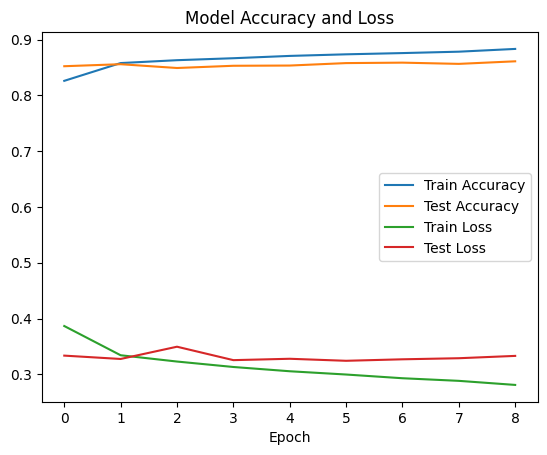

In [62]:
# Plotting accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')

# Plotting loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')

plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## LSTM

In [63]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_seq_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post')

In [64]:
class LSTMModel(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, lstm_units):
        super(LSTMModel, self).__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.dropout1 = tf.keras.layers.Dropout(0.5)
        self.lstm1 = tf.keras.layers.LSTM(lstm_units, return_sequences=True)
        self.dropout2 = tf.keras.layers.Dropout(0.5)
        self.lstm2 = tf.keras.layers.LSTM(lstm_units, return_sequences=True)
        self.attention = tf.keras.layers.Attention()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout3 = tf.keras.layers.Dropout(0.5)
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.batch_norm = tf.keras.layers.BatchNormalization()
        self.dense3 = tf.keras.layers.Dense(1, activation='sigmoid')  

    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.dropout1(x)
        x = self.lstm1(x)
        x = self.dropout2(x)
        x = self.lstm2(x)
        x = self.attention([x, x])  
        x = tf.reduce_mean(x, axis=1)  
        x = self.dense1(x)
        x = self.dropout3(x)
        x = self.dense2(x)
        x = self.batch_norm(x)
        output = self.dense3(x)  
        return output

In [65]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
lstm_units = 64
model = LSTMModel(vocab_size, embedding_dim, lstm_units)

In [66]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [67]:
history = model.fit(X_train_pad, y_train, epochs=100, batch_size=64,
          callbacks=[early_stopping],
          validation_data=(X_test_pad, y_test))

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7627 - loss: 0.4454 - val_accuracy: 0.8962 - val_loss: 0.2568
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.9423 - loss: 0.1574 - val_accuracy: 0.8924 - val_loss: 0.2742
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.9715 - loss: 0.0849 - val_accuracy: 0.8890 - val_loss: 0.3623
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.9843 - loss: 0.0454 - val_accuracy: 0.8874 - val_loss: 0.3896


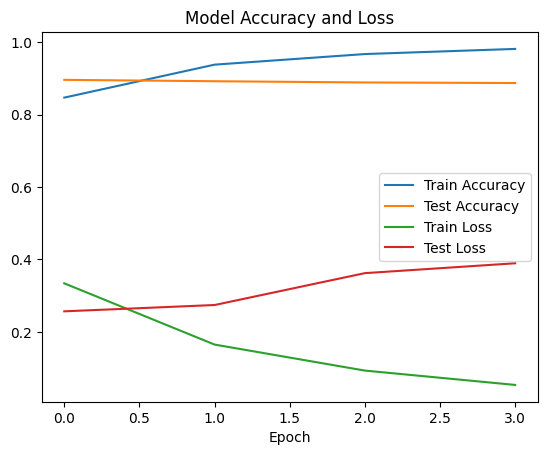

In [68]:
# Plotting accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')

# Plotting loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')

plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### SUB

In [88]:
X_seq = tokenizer.texts_to_sequences(test['text_clean'])

In [89]:
X_pad = pad_sequences(X_seq, maxlen=max_seq_length, padding='post')

In [90]:
y_pro = model.predict(X_pad)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [91]:
y_pred = (y_pro > 0.5).astype(int)

In [92]:
id = test['id']

In [93]:
y_pred = y_pred.reshape(5000,)

In [94]:
data = {'id':id,'label':y_pred}

sub = pd.DataFrame(data = data)
sub

,id,label
0,0,1
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
4995,4995,1
4996,4996,1
4997,4997,0
4998,4998,0


In [95]:
sub.to_csv('sub.csv',index = False)